In [1]:
# Importing the Libraries

import matplotlib.pyplot as plt
import cv2

In [2]:
cat4 = cv2.imread('./CATS_DOGS/train/CAT/4.jpg')
cat4 = cv2.cvtColor(cat4, cv2.COLOR_BGR2RGB)

In [3]:
cat4.shape

(375, 500, 3)

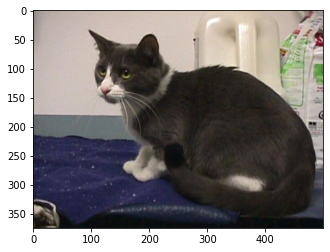

In [4]:
plt.imshow(cat4)

In [5]:
dog2 = cv2.imread('./CATS_DOGS/train/DOG/2.jpg')
dog2 = cv2.cvtColor(dog2, cv2.COLOR_BGR2RGB)

In [6]:
dog2.shape

(199, 188, 3)

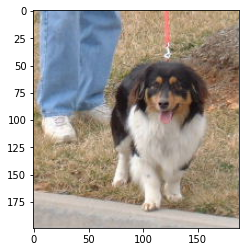

In [7]:
plt.imshow(dog2)

# DATA PREPROCESSING

In [8]:
# So we see all the images are of different sizes
# Thus we need to process the data
# And also create new images that are tilted/zoomed etc

In [9]:
from keras.preprocessing.image import ImageDataGenerator

In [10]:
image_gen = ImageDataGenerator(rotation_range=30,      # rotate the image 30 degrees
                               width_shift_range=0.1,  # Shift the pic width by a max of 10%
                               height_shift_range=0.1, # Shift the pic height by a max of 10%
                               rescale=1/255,          # Rescale the image by normalzing it
                               shear_range=0.2,        # Shear means cutting away part of the image (max 20%)
                               zoom_range=0.2,         # Zoom in by 20% max
                               horizontal_flip=True,   # Allows horizontal flipping
                               fill_mode='nearest'     # Fill in missing pixels with the nearest filled value
                              )
# All the values are upto => occurs in that range

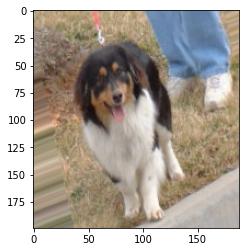

In [11]:
plt.imshow(image_gen.random_transform(dog2))

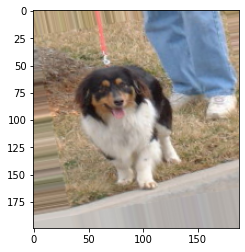

In [12]:
plt.imshow(image_gen.random_transform(dog2))

In [13]:
# Loading the Train Data

image_gen.flow_from_directory('./CATS_DOGS/train')

Found 18743 images belonging to 2 classes.


In [14]:
# Loading the Test Data

image_gen.flow_from_directory('./CATS_DOGS/test')

Found 6251 images belonging to 2 classes.


# BUILDING THE MODEL

In [15]:
input_shape = (150,150,3)

In [16]:
from keras.models import Sequential
from keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D

In [17]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=(150,150,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), input_shape=(150,150,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), input_shape=(150,150,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128))
model.add(Activation('relu'))

# Dropout randomly turns off neurons to prevent overfitting
model.add(Dropout(0.5)) # 50%

# Last layer, remember its binary, 0=cat , 1=dog
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 18496)             0

# TRAINING THE MODEL

In [19]:
batch_size = 16
train_image_gen = image_gen.flow_from_directory('./CATS_DOGS/train',
                                               target_size=input_shape[:2],
                                               batch_size=batch_size,
                                               class_mode='binary')

Found 18743 images belonging to 2 classes.


In [20]:
test_image_gen = image_gen.flow_from_directory('./CATS_DOGS/test',
                                              target_size=input_shape[:2],
                                              batch_size=batch_size,
                                              class_mode='binary')

Found 6251 images belonging to 2 classes.


In [21]:
train_image_gen.class_indices

{'CAT': 0, 'DOG': 1}

# TRAINING THE MODEL

In [22]:
import warnings
warnings.filterwarnings('ignore')

In [23]:
results = model.fit_generator(train_image_gen,epochs=100,
                              steps_per_epoch=150,
                              validation_data=test_image_gen,
                              validation_steps=12)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/100
150/150 [==============================] - 97s 648ms/step - loss: 0.6994 - accuracy: 0.4979 - val_loss: 0.7011 - val_accuracy: 0.4948
Epoch 2/100
150/150 [==============================] - 119s 792ms/step - loss: 0.6938 - accuracy: 0.4963 - val_loss: 0.6903 - val_accuracy: 0.5208
Epoch 3/100
150/150 [==============================] - 108s 722ms/step - loss: 0.6914 - accuracy: 0.5067 - val_loss: 0.6870 - val_accuracy: 0.4844
Epoch 4/100
150/150 [==============================] - 110s 732ms/step - loss: 0.6890 - accuracy: 0.5300 - val_loss: 0.6816 - val_accuracy: 0.4948
Epoch 5/100
150/150 [==============================] - 111s 742ms/step - loss: 0.6893 - accuracy: 0.5642 - val_loss: 0.6897 - val_accuracy: 0.5521
Epoch 6/100
150/150 [==============================] - 109s 725ms/step - loss: 0.6842 - accuracy: 0.5408 - val_loss: 0.6749 - val_accuracy: 0.5417
Epoch 7/100
150/150 [======================

Epoch 55/100
150/150 [==============================] - 109s 728ms/step - loss: 0.5158 - accuracy: 0.7533 - val_loss: 0.4798 - val_accuracy: 0.7604
Epoch 56/100
150/150 [==============================] - 110s 732ms/step - loss: 0.4903 - accuracy: 0.7600 - val_loss: 0.5487 - val_accuracy: 0.7292
Epoch 57/100
150/150 [==============================] - 112s 748ms/step - loss: 0.5003 - accuracy: 0.7625 - val_loss: 0.5512 - val_accuracy: 0.7708
Epoch 58/100
150/150 [==============================] - 109s 727ms/step - loss: 0.5139 - accuracy: 0.7604 - val_loss: 0.4848 - val_accuracy: 0.7865
Epoch 59/100
150/150 [==============================] - 110s 736ms/step - loss: 0.4962 - accuracy: 0.7646 - val_loss: 0.4976 - val_accuracy: 0.7604
Epoch 60/100
150/150 [==============================] - 111s 739ms/step - loss: 0.5266 - accuracy: 0.7375 - val_loss: 0.5243 - val_accuracy: 0.7344
Epoch 61/100
150/150 [==============================] - 110s 734ms/step - loss: 0.4716 - accuracy: 0.7792 - val_

In [24]:
results.history['accuracy']

[0.49791666865348816,
 0.4962500035762787,
 0.5066666603088379,
 0.5299999713897705,
 0.5641990900039673,
 0.5408333539962769,
 0.5365955829620361,
 0.565416693687439,
 0.5780008435249329,
 0.5529166460037231,
 0.5583333373069763,
 0.5612499713897705,
 0.5745833516120911,
 0.5829166769981384,
 0.5929166674613953,
 0.5859472751617432,
 0.5746549367904663,
 0.6012499928474426,
 0.6100000143051147,
 0.5920833349227905,
 0.6324999928474426,
 0.6454166769981384,
 0.6453366875648499,
 0.6424999833106995,
 0.6479166746139526,
 0.6708333492279053,
 0.652916669845581,
 0.6854872703552246,
 0.675000011920929,
 0.6741666793823242,
 0.675000011920929,
 0.699999988079071,
 0.6866666674613953,
 0.6854166388511658,
 0.7179166674613953,
 0.702634871006012,
 0.6937500238418579,
 0.7168548703193665,
 0.7179166674613953,
 0.7195833325386047,
 0.7262499928474426,
 0.7316666841506958,
 0.73416668176651,
 0.73416668176651,
 0.7300000190734863,
 0.7475000023841858,
 0.7275000214576721,
 0.7479166388511658,
 

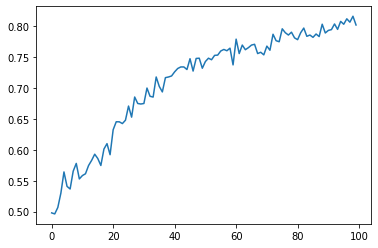

In [25]:
plt.plot(results.history['accuracy'])

In [26]:
# Saving the Model

model.save('cat_dog_100epochs.h5')

# PREDICTION

In [28]:
# Predicting on New images

import numpy as np
from keras.preprocessing import image

dog_file = './CATS_DOGS/test/Dog/9546.jpg'

dog2 = image.load_img(dog_file, target_size=(150, 150))

dog2 = image.img_to_array(dog2)

dog2 = np.expand_dims(dog2, axis=0) # Cause shape expected => (1, 150, 150, 3)
dog2 = dog2/255

In [29]:
model.predict_classes(dog2)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([[1]], dtype=int32)

In [30]:
prediction_prob = model.predict(dog2)

In [31]:
print(f'Probability that image is a dog is: {prediction_prob} ')

Probability that image is a dog is: [[0.9818725]] 
